DESCRIBING .CSV

In [1]:
import pandas as pd


df = pd.read_csv('/content/housing.csv')

print(df.describe())

print(df.info())

#look for missing values
print(df.isnull().sum())


        Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21600.000000  21603.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.372870      2.115736   
std     6239.28002  2.876566e+09  3.671272e+05      0.926657      0.768996   
min        0.00000  1.000102e+06  7.500000e+04      1.000000      0.500000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.08651

Boxplot

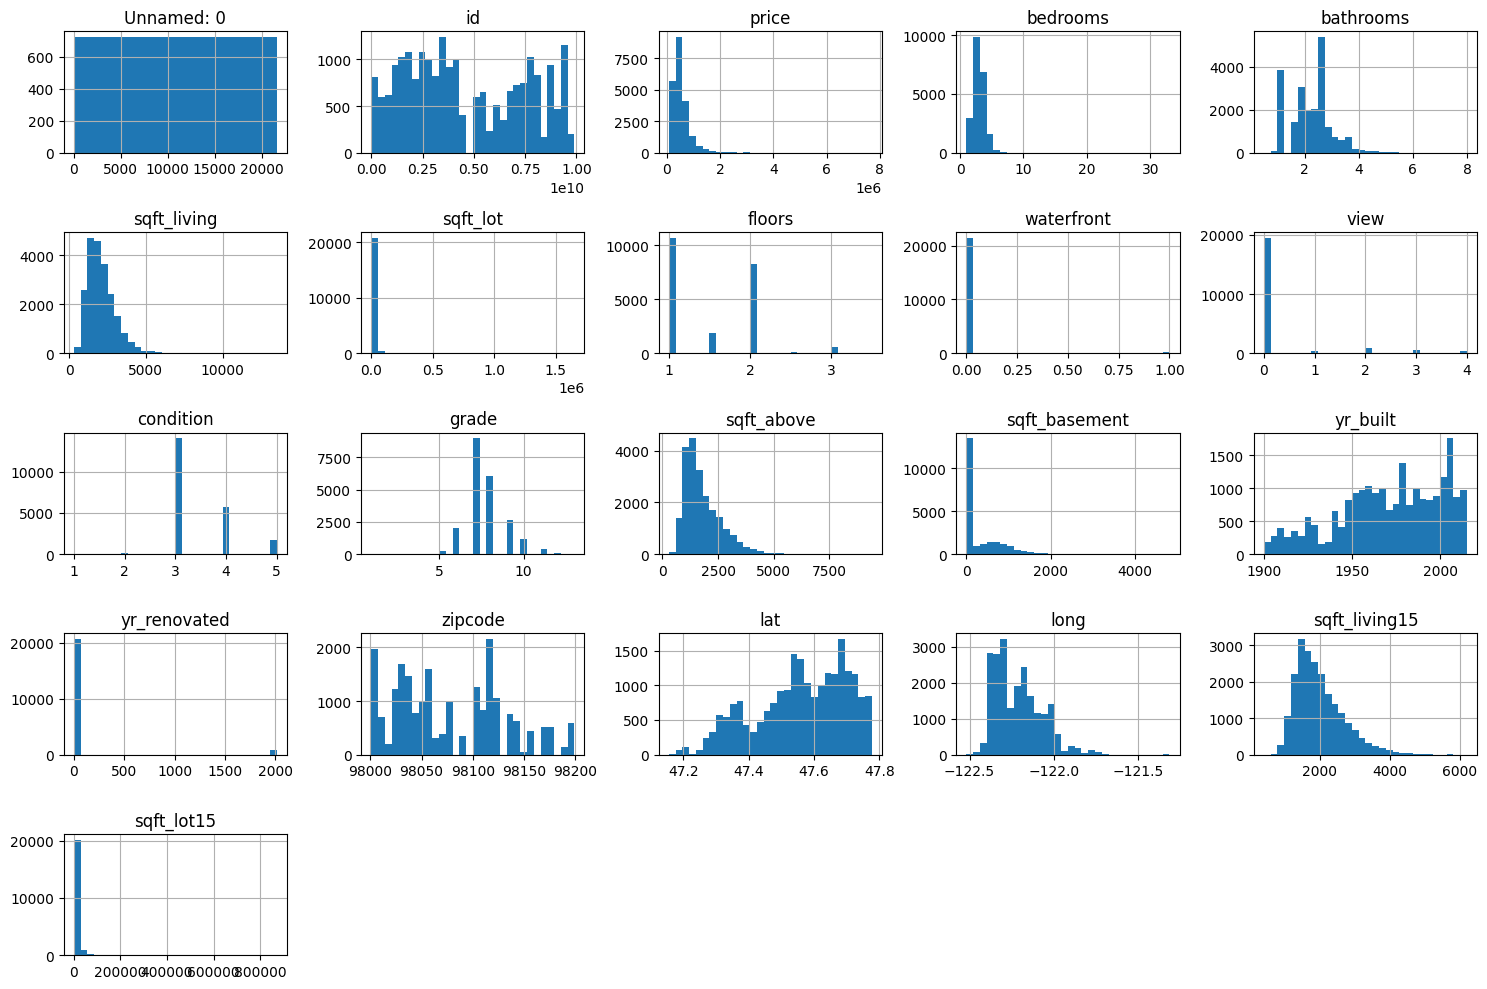

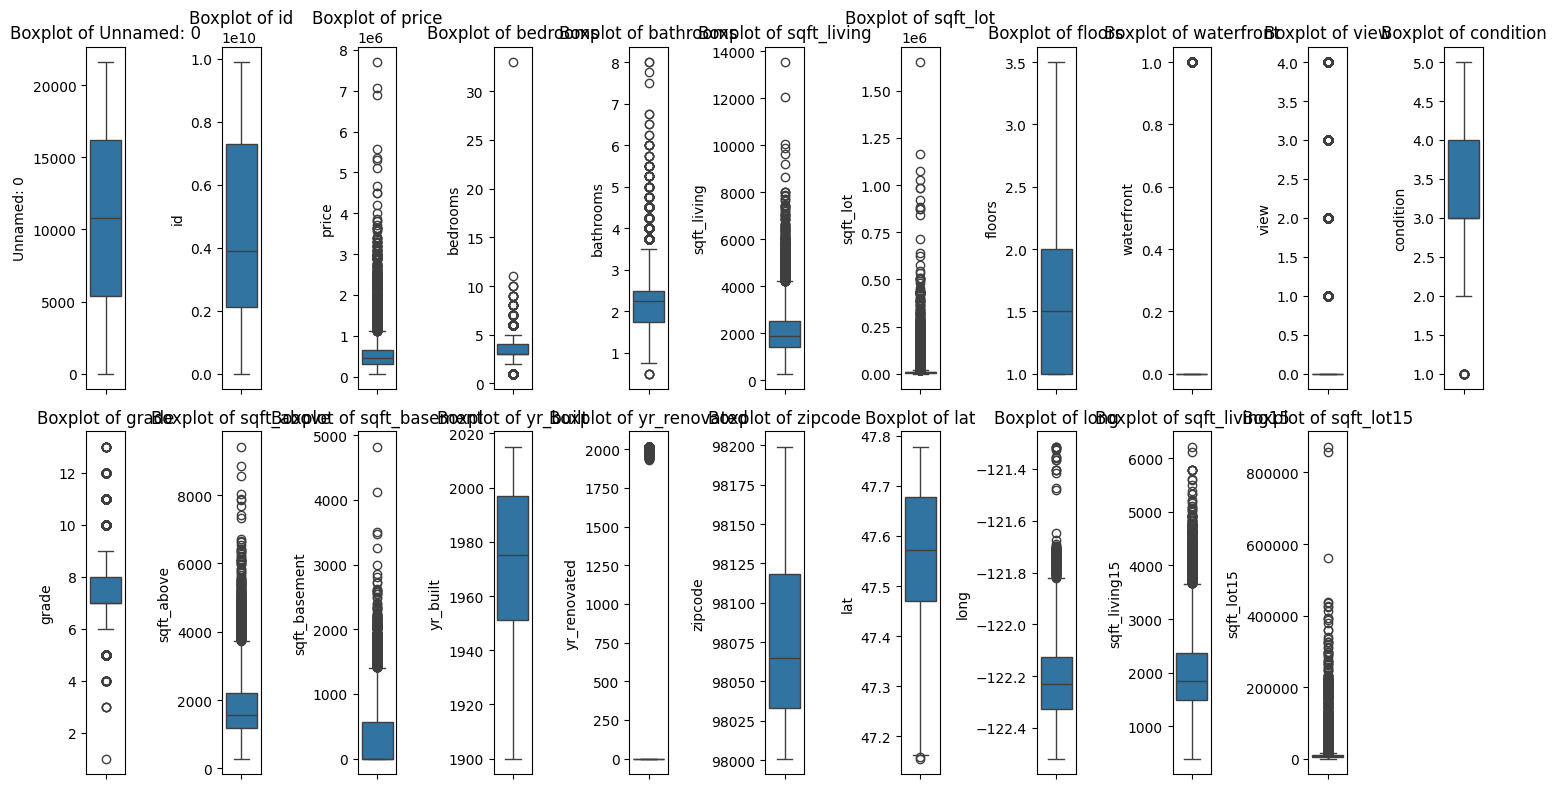

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Correlation matrix

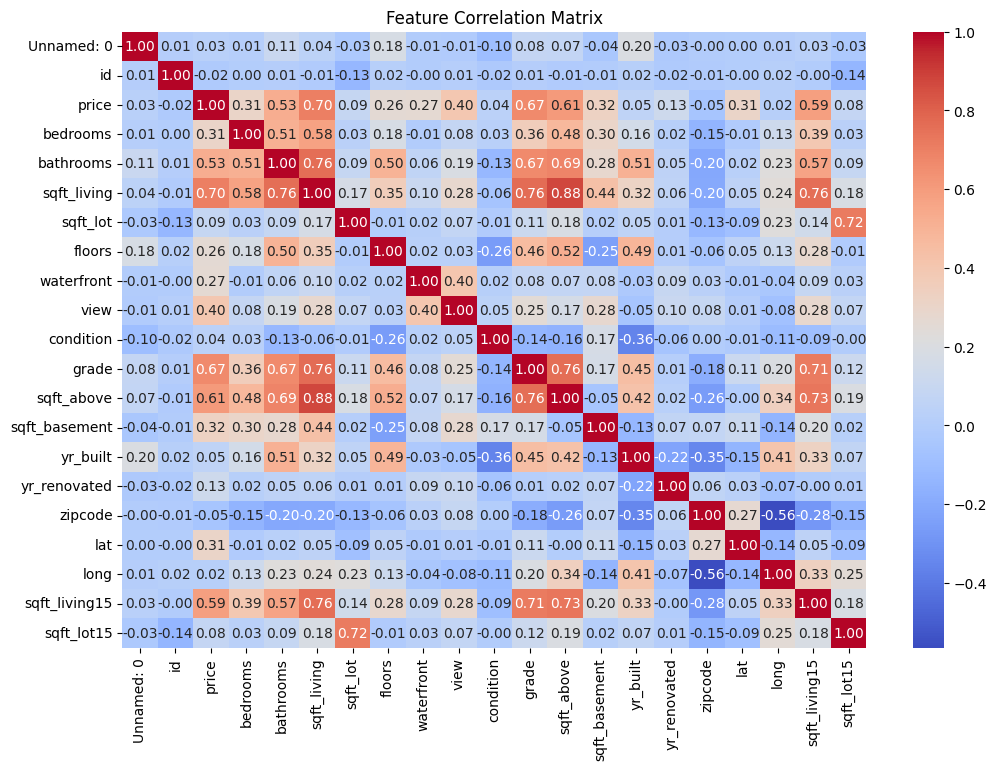

In [5]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [9]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Group by 'waterfront' (0 = No, 1 = Yes)

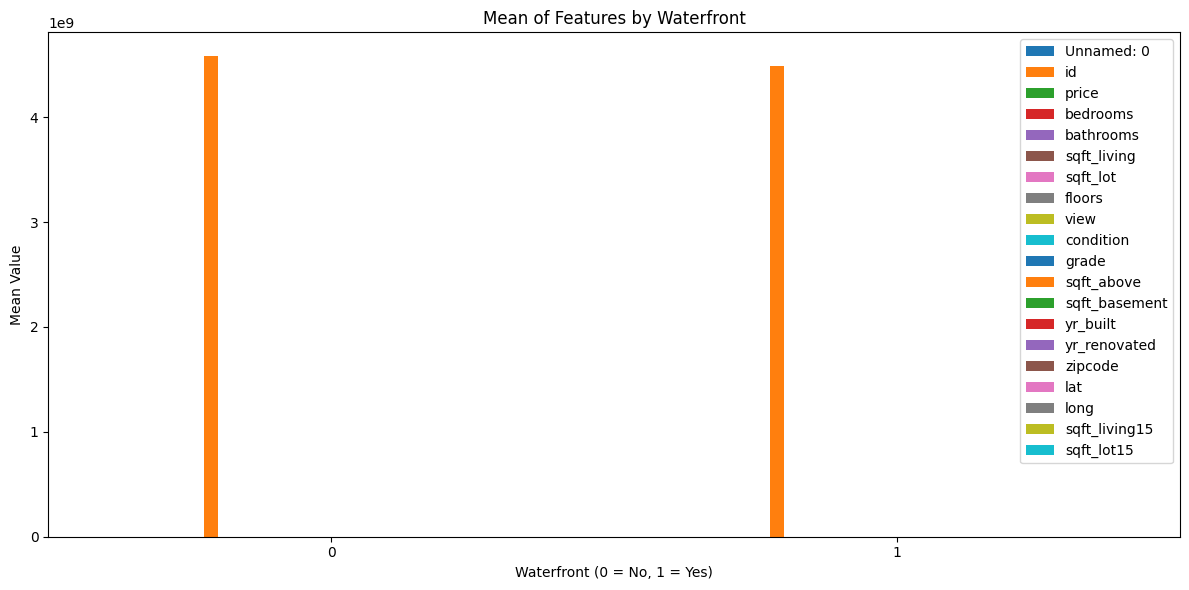

In [11]:
import matplotlib.pyplot as plt


df.groupby('waterfront').mean(numeric_only=True).plot(kind='bar', figsize=(12, 6))

plt.title('Mean of Features by Waterfront')
plt.ylabel('Mean Value')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


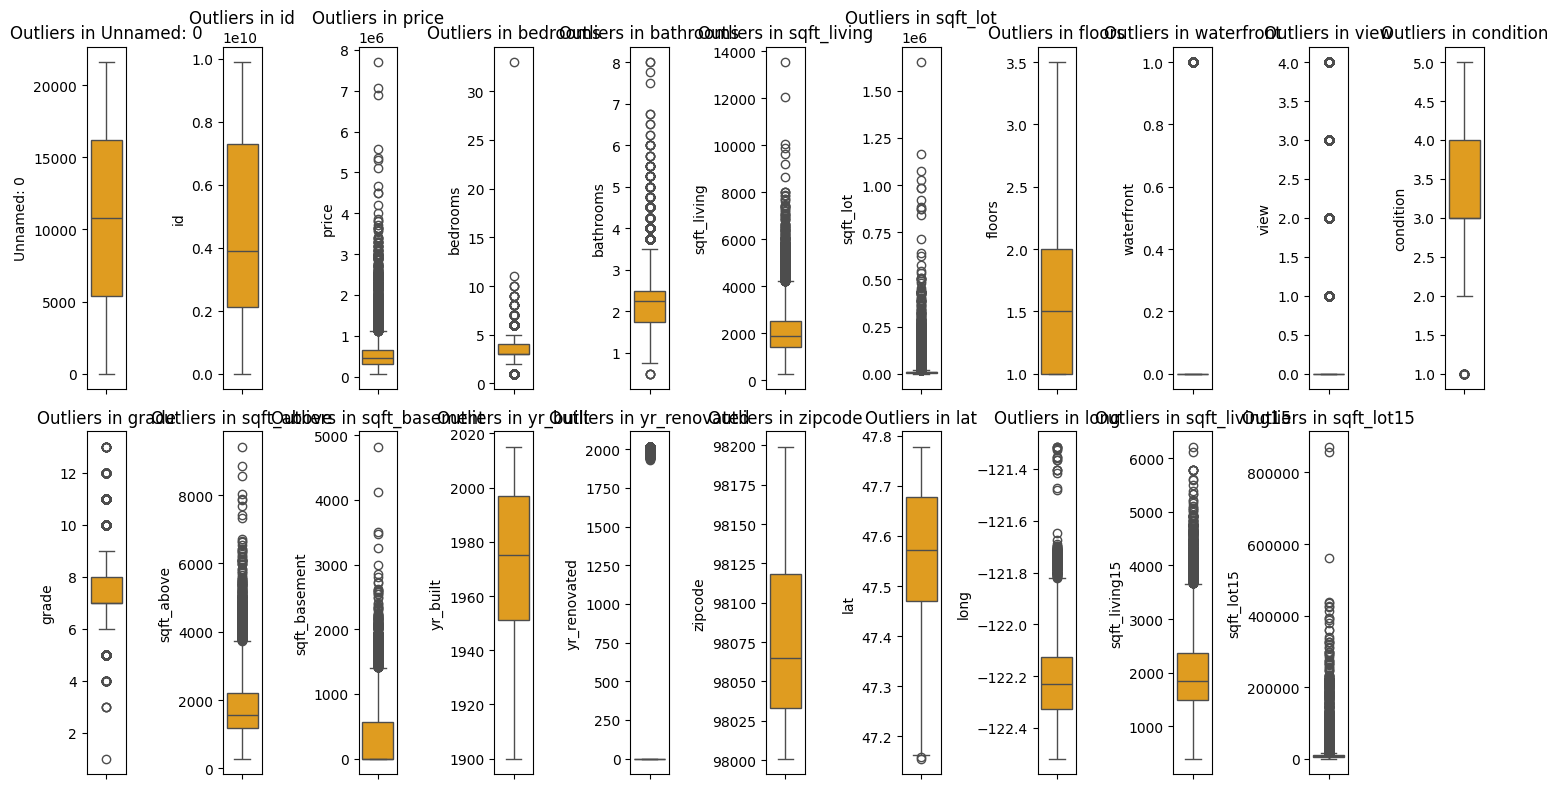


 Skewness of Numeric Features:
Unnamed: 0: 0.00 (Fairly Symmetric)
id: 0.24 (Fairly Symmetric)
price: 4.02 (Right Skewed)
bedrooms: 2.02 (Right Skewed)
bathrooms: 0.52 (Right Skewed)
sqft_living: 1.47 (Right Skewed)
sqft_lot: 13.06 (Right Skewed)
floors: 0.62 (Right Skewed)
waterfront: 11.38 (Right Skewed)
view: 3.40 (Right Skewed)
condition: 1.03 (Right Skewed)
grade: 0.77 (Right Skewed)
sqft_above: 1.45 (Right Skewed)
sqft_basement: 1.58 (Right Skewed)
yr_built: -0.47 (Fairly Symmetric)
yr_renovated: 4.55 (Right Skewed)
zipcode: 0.41 (Fairly Symmetric)
lat: -0.49 (Fairly Symmetric)
long: 0.88 (Right Skewed)
sqft_living15: 1.11 (Right Skewed)
sqft_lot15: 9.51 (Right Skewed)


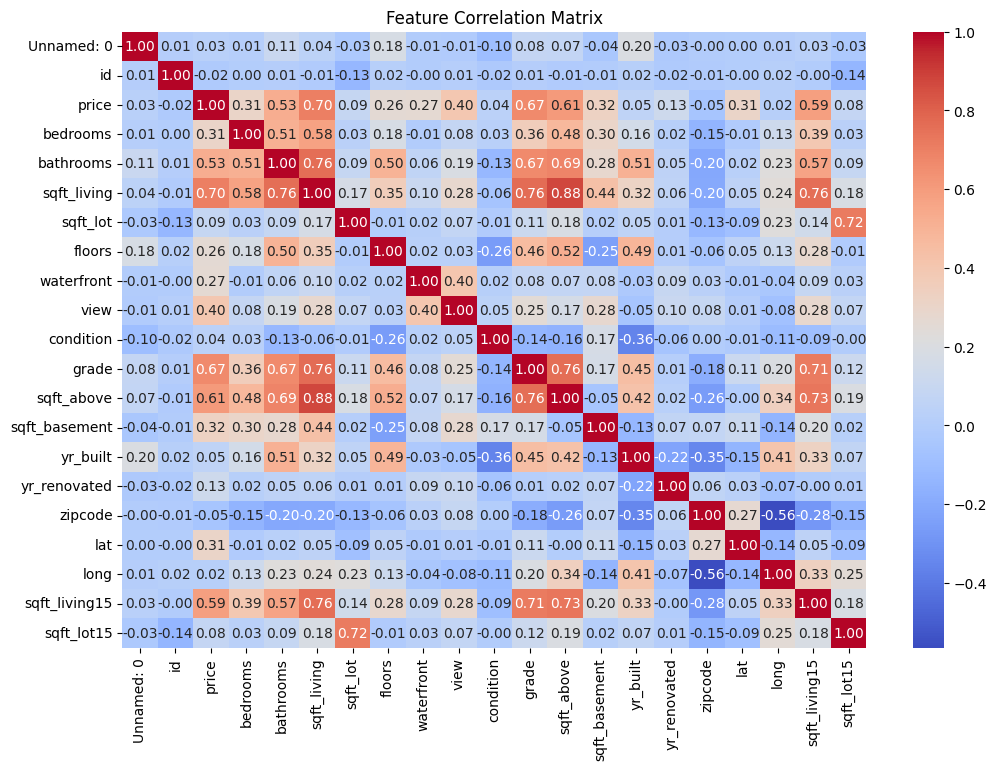

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

# Load your dataset
df = pd.read_csv('/content/housing.csv')

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 1. OUTLIERS CHECK — Using Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# 2. SKEWNESS CHECK — Numerical Skew Values
print("\n Skewness of Numeric Features:")
for col in numeric_cols:
    col_skew = skew(df[col].dropna())
    skew_type = 'Right Skewed' if col_skew > 0.5 else 'Left Skewed' if col_skew < -0.5 else 'Fairly Symmetric'
    print(f"{col}: {col_skew:.2f} ({skew_type})")

# 3. CORRELATIONS — Heatmap
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


HISTOGRAM & SCATTERPLOT

In [15]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv('/content/housing.csv')

# Histogram

fig = px.histogram(
    df,
    x='sqft_living',
    nbins=50,
    title='Distribution of Square Footage (Living Area)',
    labels={'sqft_living': 'Sqft Living'}
)
fig.show()


# Scatter Plot Example

#sqft_living vs price, color by grade
fig = px.scatter(
    df,
    x='sqft_living',                # X-axis
    y='price',                      # Y-axis
    color='grade',                  # Color encoding (categorical or numeric)
    title='Price vs Sqft Living Colored by Grade',
    labels={'sqft_living': 'Sqft Living', 'price': 'Price'}
)
fig.show()
